Saving creditcard.csv to creditcard.csv
Dataset Loaded Successfully!
Dataset Shape: (284807, 31)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


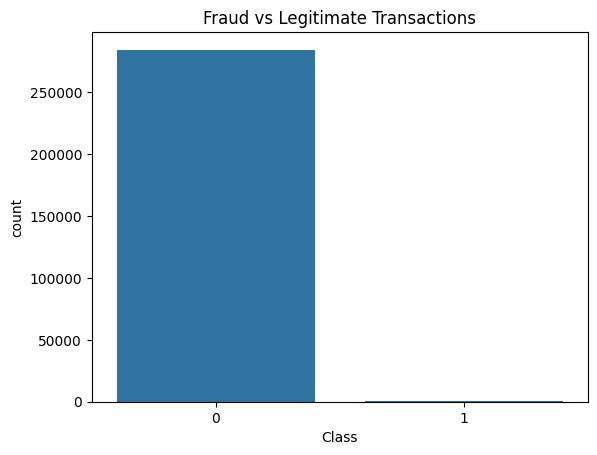


Before SMOTE: Class
0    39934
1       66
Name: count, dtype: int64
After SMOTE: Class
0    39934
1    39934
Name: count, dtype: int64

Confusion Matrix:
[[9981    2]
 [   5   12]]


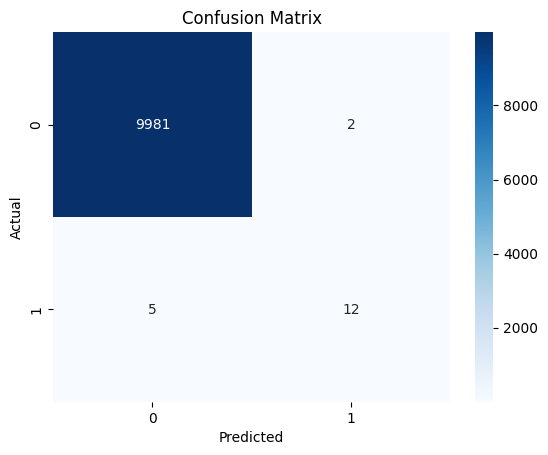


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9983
           1       0.86      0.71      0.77        17

    accuracy                           1.00     10000
   macro avg       0.93      0.85      0.89     10000
weighted avg       1.00      1.00      1.00     10000

ROC-AUC Score: 0.8528410061810962

Model Implementation Completed Successfully!


In [ ]:
# ===============================
# BANKING FRAUD DETECTION PROJECT
# Classification Implementation
# ===============================

# Install required library
!pip install imbalanced-learn -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# ===============================
# STEP 1: Upload Dataset
# ===============================

from google.colab import files
uploaded = files.upload()

# Replace filename if needed
data = pd.read_csv("creditcard.csv")

print("Dataset Loaded Successfully!")
print("Dataset Shape:", data.shape)

# ===============================
# STEP 2: Check Class Distribution
# ===============================

print("\nClass Distribution:")
print(data["Class"].value_counts())

sns.countplot(x=data["Class"])
plt.title("Fraud vs Legitimate Transactions")
plt.show()

# ===============================
# STEP 3: Reduce Size (Faster Training)
# ===============================

data = data.sample(n=50000, random_state=42)

# ===============================
# STEP 4: Split Features & Target
# ===============================

X = data.drop("Class", axis=1)
y = data["Class"]

# ===============================
# STEP 5: Train Test Split
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# STEP 6: Handle Imbalanced Data (SMOTE)
# ===============================

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nBefore SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

# ===============================
# STEP 7: Feature Scaling
# ===============================

scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# ===============================
# STEP 8: Train Random Forest Model
# ===============================

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

# ===============================
# STEP 9: Predictions
# ===============================

y_pred = model.predict(X_test)

# ===============================
# STEP 10: Evaluation
# ===============================

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("\nModel Implementation Completed Successfully!")
